# Image Comparison

For the final chapter, you'll need to use your brain... and hundreds of others! Drawing data from more than 400 open-access MR images, you'll learn the basics of registration, resampling, and image comparison. Then, you'll use the extracted measurements to evaluate the effect of Alzheimer's Disease on brain structure.

## Translations

In [ ]:
# Find image center of mass
com = ndi.center_of_mass(im)

# Calculate amount of shift needed
d0 = 128 - com[0]
d1 = 128 - com[1]

# Translate the brain towards the center
xfm = ndi.shift(im, shift=(d0, d1))

# Plot the original and adjusted images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im)
axes[1].imshow(xfm)
format_and_render_plot()

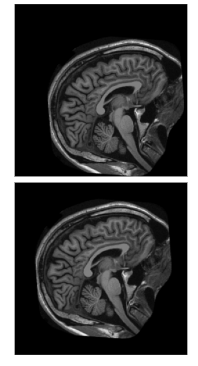

## Rotations

In [ ]:
# Shift the image towards the center
xfm = ndi.shift(im, shift=(-20, -20))

# Rotate the shifted image
xfm = ndi.rotate(xfm, angle=-30, reshape=False)

# Plot the original and rotated images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im)
axes[1].imshow(xfm)
format_and_render_plot()

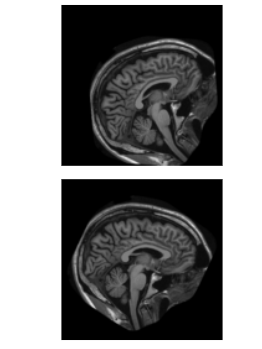

## Affine transform

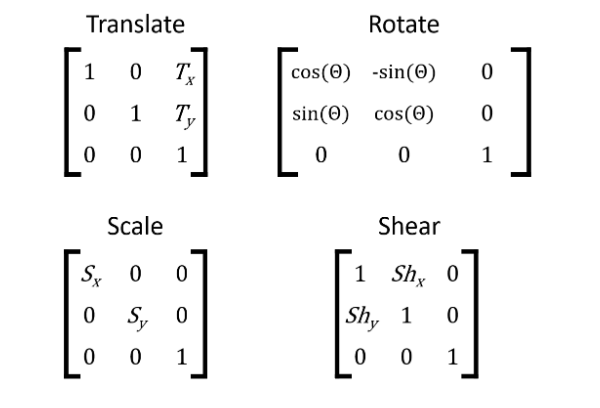

# Resampling

In [ ]:
# Center and level image
xfm = ndi.shift(im, shift=(-20, -20))
xfm = ndi.rotate(xfm, angle=-35, reshape=False)

# Resample image
im_dn = ndi.zoom(xfm, zoom=0.25)
im_up = ndi.zoom(xfm, zoom=4.00)

# Plot the images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im_dn)
axes[1].imshow(im_up)
format_and_render_plot()

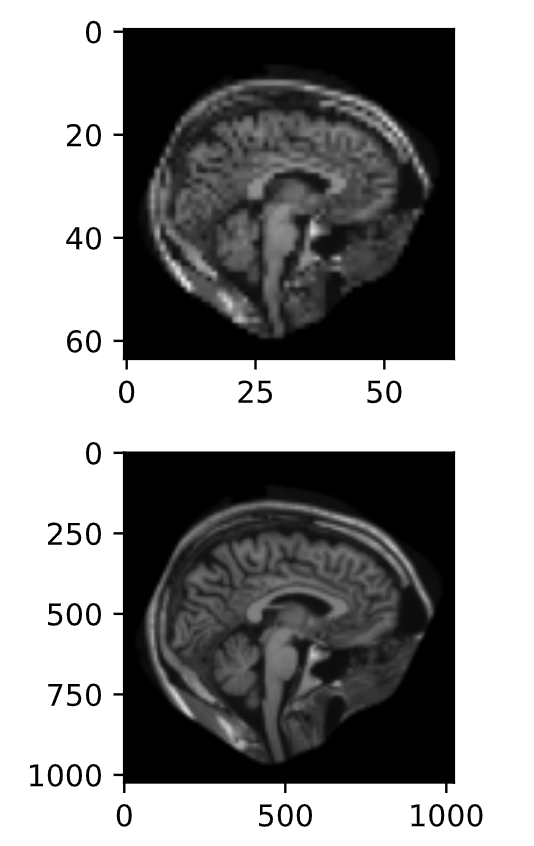

## Interpolation

In [ ]:
# Upsample "im" by a factor of 4
up0 = ndi.zoom(im, zoom=512/128, order=0)
up5 = ndi.zoom(im, zoom=512/128, order=5)

# Print original and new shape
print('Original shape:', im.shape)
print('Upsampled shape:', up0.shape)

# Plot close-ups of the new images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(up0[128:256, 128:256])
axes[1].imshow(up5[128:256, 128:256])
format_and_render_plots()

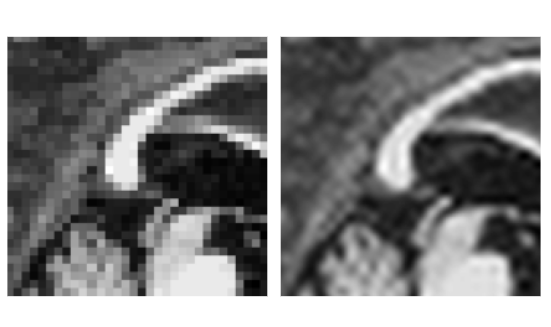

## Mean absolute error

In [ ]:
# Calculate image difference
err = im1 - im2

# Plot the difference
plt.imshow(err, cmap='seismic', vmin=-200, vmax=200)
format_and_render_plot()

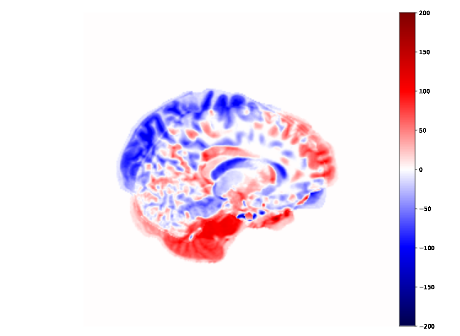

In [ ]:
# Calculate absolute image difference
abs_err = np.abs(im1 - im2)

# Plot the difference
plt.imshow(abs_err, cmap='seismic', vmin=-200, vmax=200)
format_and_render_plot()

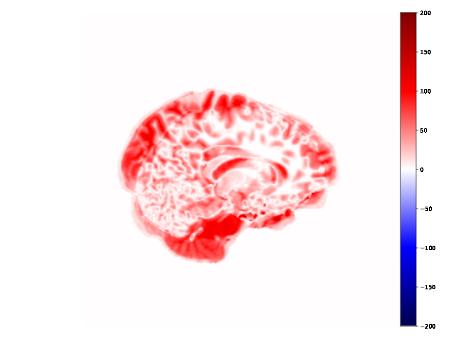

In [ ]:
# Calculate mean absolute error
mean_abs_err = np.mean(np.abs(im1 - im2))
print('MAE:', mean_abs_err)

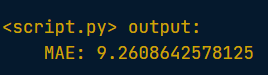

## Intersection of the union

In [ ]:
def intersection_of_union(im1, im2):
    i = np.logical_and(im1, im2)
    u = np.logical_or(im1, im2)
    return i.sum() / u.sum()

## Identifying potential confounds

In [ ]:
# Print random sample of rows
print(df.sample(3))

# Print prevalence of Alzheimer's Disease
print(df.alzheimers.value_counts())

# Print a correlation table
print(df.corr())

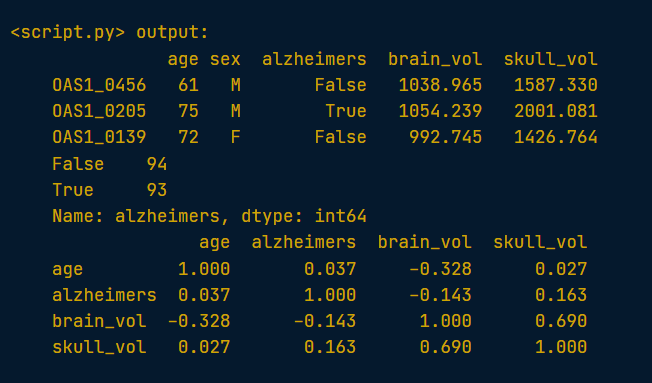

## Testing group differences

In [ ]:
# Import independent two-sample t-test
from scipy.stats import ttest_ind

# Select data from "alzheimers" and "typical" groups
brain_alz = df.loc[df.alzheimers == True, 'brain_vol']
brain_typ = df.loc[df.alzheimers == False, 'brain_vol']

# Perform t-test of "alz" > "typ"
results = ttest_ind(brain_alz, brain_typ)
print('t = ', results.statistic)
print('p = ', results.pvalue)

# Show boxplot of brain_vol differences
df.boxplot(column='brain_vol', by='alzheimers')
plt.show()

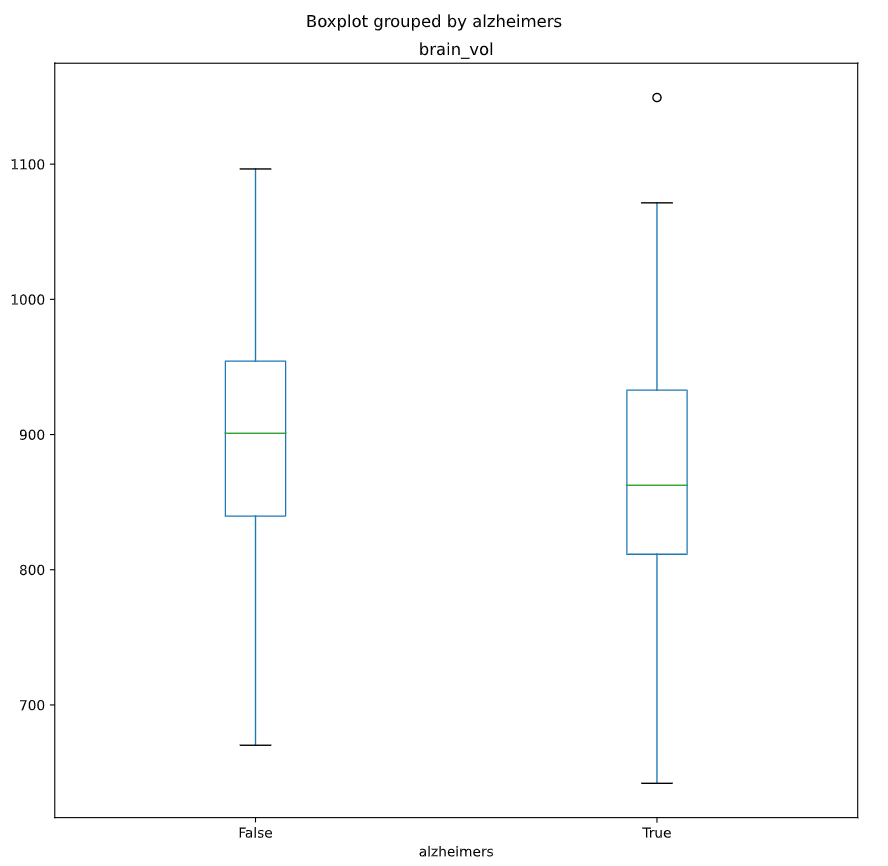

## Normalizing metrics

In [ ]:
# Import independent two-sample t-test
from scipy.stats import ttest_ind

# Divide `df.brain_vol` by `df.skull_vol`
df['adj_brain_vol'] = df.brain_vol / df.skull_vol

# Select brain measures by Alzheimers group
brain_alz = df.loc[df.alzheimers == True, 'adj_brain_vol']
brain_typ = df.loc[df.alzheimers == False, 'adj_brain_vol']

# Evaluate null hypothesis
results = ttest_ind(brain_alz, brain_typ)

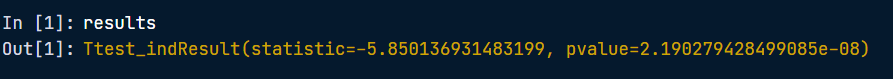